In [1]:
# Testing Docker on Cloud! ;)


In [2]:
%matplotlib inline
# from tweepy import OAuthHandler
# from tweepy import API
# from tweepy import Cursor
import json
import pandas as pd
import matplotlib as mpl
print 'OK!'

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rcParams
from mpltools import style
from matplotlib import dates
from datetime import datetime
import seaborn as sns
import time
import os
import scipy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

print 'OK!'

/opt/ds/local/lib/python2.7/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)
/opt/ds/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


OK!
OK!


In [15]:
# Seaborn plots
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
# for R lovers :)
style.use('ggplot')
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 7
# rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['text.usetex'] = False
rcParams['figure.figsize'] = 20, 10

print 'OK!'

OK!


In [3]:
# %matplotlib inline

# import json
# import pandas as pd
# import matplotlib.pyplot as plt

tweets_data_path = 'data/peda.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

print len(tweets_data)

499


In [6]:
import time

tweets = pd.DataFrame()

tweets['created_at'] = map(lambda tweet: time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')), tweets_data)
tweets['user'] = map(lambda tweet: tweet['user']['screen_name'], tweets_data)
tweets['user_followers_count'] = map(lambda tweet: tweet['user']['followers_count'], tweets_data)
tweets['retweet_count'] = map(lambda tweet: tweet['retweet_count'], tweets_data)
tweets['favorite_count'] = map(lambda tweet: tweet['favorite_count'], tweets_data)

print 'OK!'

tweets.info()
tweets.head()

OK!
<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 5 columns):
created_at              499 non-null object
user                    499 non-null object
user_followers_count    499 non-null int64
retweet_count           499 non-null int64
favorite_count          499 non-null int64
dtypes: int64(3), object(2)
memory usage: 23.4+ KB


,created_at,user,user_followers_count,retweet_count,favorite_count
0,2016-04-18 02:46:09,fckchimchim,342,0,0
1,2016-04-18 02:46:09,ViniVicen99,322,0,0
2,2016-04-18 02:46:09,Deb_alves,131,0,0
3,2016-04-18 02:46:09,danrodmac1,480,0,0
4,2016-04-18 02:46:10,whatniih,150,0,0


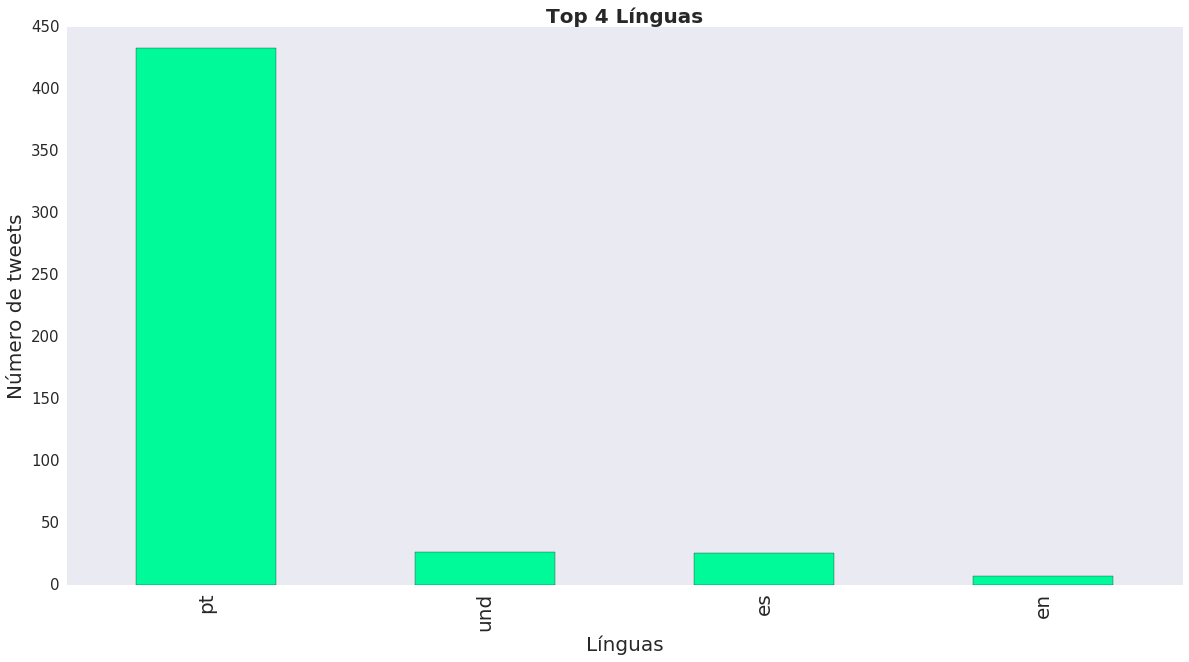

In [7]:
tweets = pd.DataFrame()

tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country']
                        if tweet['place'] != None else None, tweets_data)

tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Línguas'.decode('utf-8'), fontsize=20)
ax.set_ylabel('Número de tweets'.decode('utf-8') , fontsize=20)
ax.set_title('Top 4 Línguas'.decode('utf-8'), fontsize=20, fontweight='bold')
tweets_by_lang[:4].plot(ax=ax, kind='bar', color='mediumspringgreen')
plt.grid()


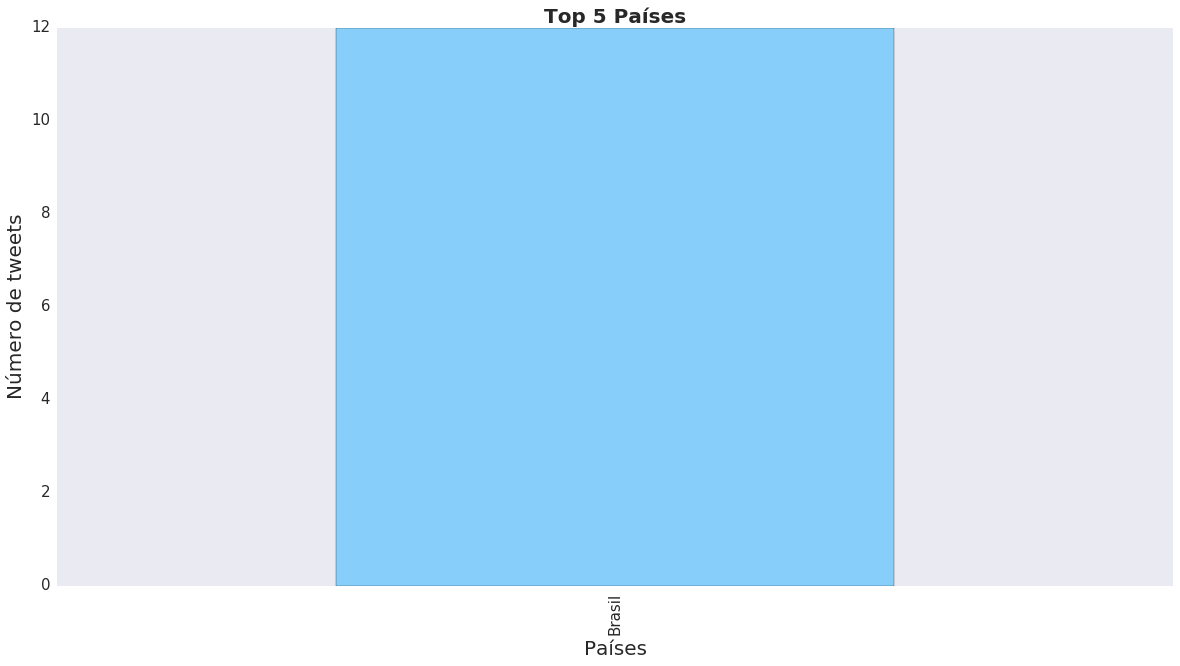

In [8]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Países'.decode('utf-8'), fontsize=20)
ax.set_ylabel('Número de tweets'.decode('utf-8') , fontsize=20)
ax.set_title('Top 5 Países'.decode('utf-8'), fontsize=20, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='lightskyblue')
plt.grid()

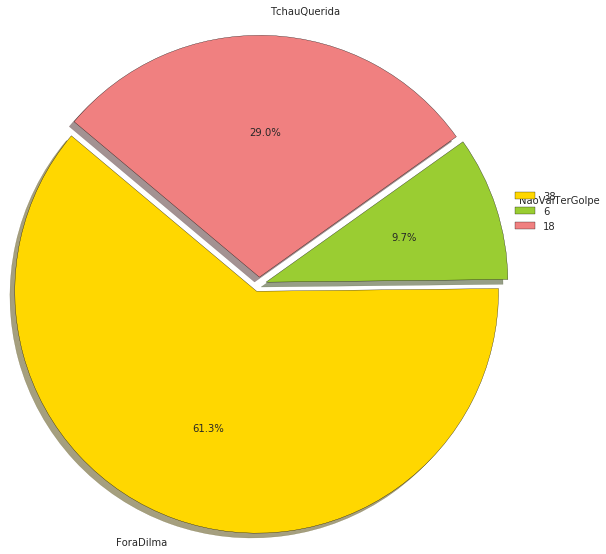

In [10]:
import re


def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

tweets['NaoVaiTerGolpe'] = tweets['text'].apply(lambda tweet: word_in_text('NaoVaiTerGolpe', tweet))
tweets['TchauQuerida'] = tweets['text'].apply(lambda tweet: word_in_text('TchauQuerida', tweet))
tweets['ForaDilma'] = tweets['text'].apply(lambda tweet: word_in_text('ForaDilma', tweet))
# tweets['BrasilContraOGolpe'] = tweets['text'].apply(lambda tweet: word_in_text('BrasilContraOGolpe', tweet))
# tweets['ForaCunha'] = tweets['text'].apply(lambda tweet: word_in_text('ForaCunha', tweet))

# print tweets['FicaQuerida'].value_counts()[True]
# print tweets['NaoVaiTerGolpe'].value_counts()[True]
# print tweets['ForaPT'].value_counts()[True]

# hashtags = ['ForaDilma', 'NaoVaiTerGolpe', 'TchauQuerida', 'BrasilContraOGolpe', 'ForaCunha']
hashtags = ['ForaDilma', 'NaoVaiTerGolpe', 'TchauQuerida']
tweets_by_hashtags = [tweets['ForaDilma'].value_counts()[True],
                      tweets['NaoVaiTerGolpe'].value_counts()[True],
                      tweets['TchauQuerida'].value_counts()[True]]
#                       tweets['BrasilContraOGolpe'].value_counts()[True],
#                       tweets['ForaCunha'].value_counts()[True]]

plt.subplots(figsize=(9,9))
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.03, 0.03, 0.03)
plt.pie(tweets_by_hashtags, explode=explode, labels=hashtags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.rcParams['font.size'] = 12
plt.legend(tweets_by_hashtags, loc=(1,.6))
plt.axis('equal')
plt.show()

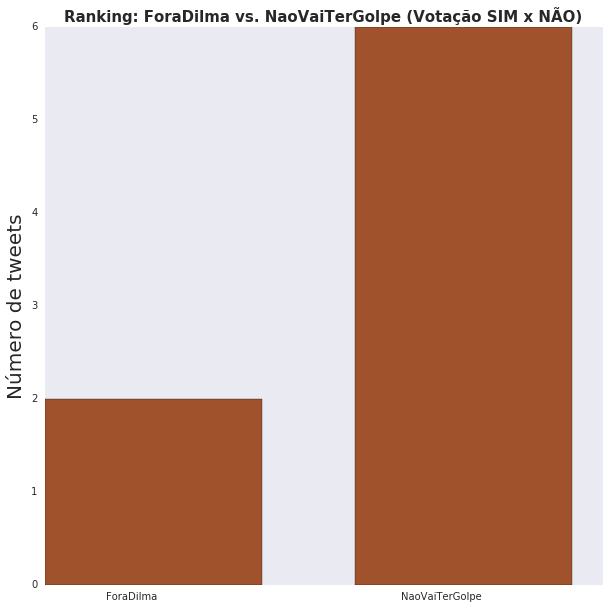

In [11]:
tweets['nao'] = tweets['text'].apply(lambda tweet: word_in_text('nao', tweet))
tweets['sim'] = tweets['text'].apply(lambda tweet: word_in_text('sim', tweet))

tweets['ImpeachmentDay'] = tweets['text'].apply(lambda tweet: word_in_text('sim', tweet) 
                                          or word_in_text('nao', tweet))

# print tweets['nao'].value_counts()[True]
# print tweets['sim'].value_counts()[True]
# print tweets['ImpeachmentDay'].value_counts()[True]

# print tweets[tweets['ImpeachmentDay'] == True]['ForaDilma'].value_counts()[True]
# print tweets[tweets['ImpeachmentDay'] == True]['NaoVaiTerGolpe'].value_counts()[True]

hashtags = ['ForaDilma', 'NaoVaiTerGolpe']
tweets_by_hashtags = [tweets[tweets['ImpeachmentDay'] == True]['ForaDilma'].value_counts()[True], 
                      tweets[tweets['ImpeachmentDay'] == True]['NaoVaiTerGolpe'].value_counts()[True]]

x_pos = list(range(len(hashtags)))
width = 0.7
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(x_pos, tweets_by_hashtags, width, alpha=1, color='sienna')
ax.set_ylabel('Número de tweets'.decode('utf-8'), fontsize=20)
ax.set_title('Ranking: ForaDilma vs. NaoVaiTerGolpe (Votação SIM x NÃO)'.decode('utf-8'),
             fontsize=15, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(hashtags)
plt.grid()

In [12]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

tweets_relevant = tweets[tweets['ImpeachmentDay'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

print tweets_relevant_with_link[tweets_relevant_with_link['TchauQuerida'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['ForaDilma'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['ForaCunha'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['NaoVaiTerGolpe'] == True]['link']

332    https://t.co/5YpbGxCrcf
Name: link, dtype: object
67    https://…
Name: link, dtype: object
Series([], Name: link, dtype: object)
3      https://t.co/3YWaxW3B5k
117              https://t.co…
Name: link, dtype: object


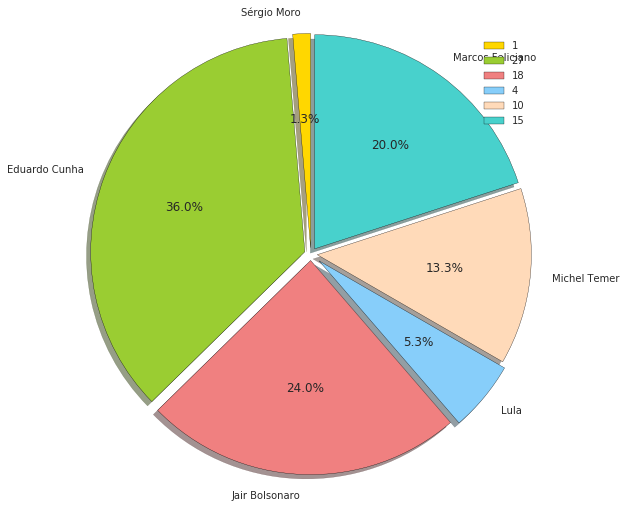

In [13]:
tweets['moro'] = tweets['text'].apply(lambda tweet: word_in_text('moro', tweet))
tweets['cunha'] = tweets['text'].apply(lambda tweet: word_in_text('cunha', tweet))
tweets['bolsonaro'] = tweets['text'].apply(lambda tweet: word_in_text('bolsonaro', tweet))
tweets['lula'] = tweets['text'].apply(lambda tweet: word_in_text('lula', tweet))
tweets['temer'] = tweets['text'].apply(lambda tweet: word_in_text('temer', tweet))
tweets['feliciano'] = tweets['text'].apply(lambda tweet: word_in_text('feliciano', tweet))

hashtags = ['Sérgio Moro'.decode('utf-8'), 'Eduardo Cunha', 'Jair Bolsonaro', 'Lula', 'Michel Temer', 'Marcos Feliciano']
tweets_by_hashtags = [tweets['moro'].value_counts()[True],
                      tweets['cunha'].value_counts()[True],
                      tweets['bolsonaro'].value_counts()[True],
                      tweets['lula'].value_counts()[True],
                      tweets['feliciano'].value_counts()[True],
                      tweets['temer'].value_counts()[True]]

plt.subplots(figsize=(8,8))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'peachpuff', 'mediumturquoise']
explode = (0.03, 0.03, 0.03, 0.05, 0.03, 0.03)
plt.pie(tweets_by_hashtags, explode=explode, labels=hashtags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.rcParams['font.size'] = 12
plt.legend(tweets_by_hashtags, loc='best')
plt.axis('equal')
plt.show()

In [ ]:
import io, json

def twitter_search(q, max_results=1000, **kw):
    search_results = twitter_api.search.tweets(q=q, count=1000, **kw)
    
    statuses = search_results['statuses']
    
    max_results = min(10000, max_results)
    
    for _ in range(10):
        try:
            next_results = search_results['search_metadata']['next_resuts']
        except KeyError, e:
            break
            
        kwargs = dict([ kv.split('=')
                        for kv in next_results[1:].split("&") ])
        
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
        
        if len(statuses) > max_results:
            break
            
    return statuses

twitter_api = oauth_login()

q = 'ForaInternetLimitada'
results = twitter_search(twitter_api, q, max_results=1000)

print json.dumps(results[0], indent=1)
                    
    

In [ ]:
def save_json(filename, data):
    with io.open('data/{0}.json'.format(filename),
                 'w', encoding='utf-8') as f:
            f.write(unicode(json.dumps(data, ensure_ascii=False)))
    
def load_json(filename):
    with io.open('data/{0}.json'.format(filename),
                  encoding='utf-8') as f:
            return f.read()

q = 'ForaInternetLimitada'



twitter_api = oauth_login()
results = twitter_search(twitter_api, q, max_results=1000)

save_json(q, results)
results = load_json(q)

# print json.dumps(results, indent=1)

# print json.dumps(br_trends, indent=1)

